# Préambule : régression linéaire, régression rigide et LASSO

## Récupération des données USPS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import *
import matplotlib.colors as col
import random

In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

In [3]:
def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()

In [4]:
dtrx , dtry = load_usps ( "USPS/USPS_train.txt" )
dtex , dtey = load_usps ( "USPS/USPS_test.txt" )

## Régression linéaire

Nous avons commencé par tester le modèle de régession linéaire sur les données usps utilisées durant certain tme. 

In [5]:
#création de notre régression linéaire
reg_lin = linear_model.LinearRegression()
#apprentissage
reg_lin.fit(dtrx, dtry)
#prédiction
pred_train = reg_lin.predict(dtrx)
pred_test = reg_lin.predict(dtex)
#affichage des résultats
#print("Les coefficients sont : ", reg_lin.coef_)
mse_train = mean_squared_error(dtry, pred_train)
mse_test = mean_squared_error(dtey, pred_test)
print("Cout quadratique moyenne (MSE) du train : ", mse_train)
print("Cout quadratique moyenne (MSE) du test : ", mse_test)
print("Score variance train : ", r2_score(dtry, pred_train))
print("Score variance test : ", r2_score(dtey, pred_test))

Cout quadratique moyenne (MSE) du train :  3.09390729246
Cout quadratique moyenne (MSE) du test :  3.75490531356
Score variance train :  0.655355528648
Score variance test :  0.587676847955


On observe un coût quadratique plus faible en utilisant les données d'apprentissage qu'en utilisant les données de test ainsi qu'un score de bonnes classification plus élevé sur les données d'apprentissage que sur les données de test.

## Régression ridge

Nous avons ensuite testé la régression ridge, en faisant varier la valeur du paramètre alpha.

In [6]:
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 30, 100]

score train :  [0.60055374446528442, 0.60055374446528198, 0.60055374446503063, 0.60055374443989162, 0.60055374193272426, 0.60055349777903011, 0.60054822742308778, 0.60053433055044114, 0.60032241819691712, 0.60002764996312663, 0.59896290353217407, 0.59562835176265627]
score test :  [0.52724206848215538, 0.52724207175494242, 0.52724210448258391, 0.52724243173503926, 0.5272457018715333, 0.52727816993755572, 0.52741787324274436, 0.52758384435700989, 0.52871943045623693, 0.52985996677615899, 0.53280590452631005, 0.53639091772324554]


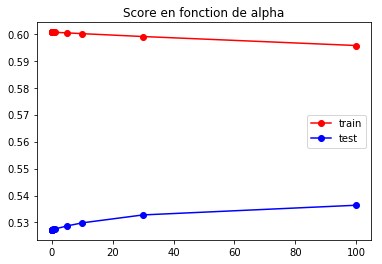

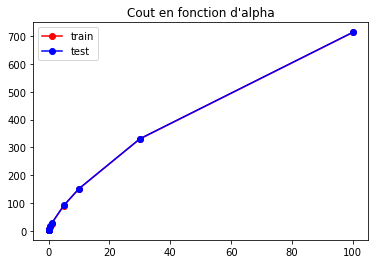

In [7]:
coefs = []
score_train = []
score_test = []
cout_train = []
cout_test = []
for a in alpha:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(dtrx, dtry)
    score_train.append(ridge.score(dtrx, dtry))
    score_test.append(ridge.score(dtex, dtey))
    
    pred_train = ridge.predict(dtrx) 
    pred_test = ridge.predict(dtex)
    w = sqrt(sum(np.array(ridge.coef_)*np.array(ridge.coef_)))
    cout_train.append(mean_squared_error(dtry, pred_train) + a*(w**2))
    cout_test.append(mean_squared_error(dtey, pred_test) + a*(w**2))
    
print("score train : ", score_train)
print("score test : ", score_test)

plt.plot(alpha, score_train, marker="o", color='red', label='train')
plt.plot(alpha, score_test, marker="o", color='blue', label='test')
plt.title("Score en fonction de alpha")
plt.legend()
plt.show()

plt.plot(alpha, cout_train, marker="o", color='red', label="train")
plt.plot(alpha, cout_test, marker="o", color='blue', label="test")
plt.title("Cout en fonction d'alpha")
plt.legend()
plt.show()

Nous observons que le score de bonnes classifications diminu plus alpha augmente lorsqu'on utilise les données d'apprentissage alors qu'au contraire avec les données de test le score augmente lorsque alpha augmente.
D'autre part que ce soit avec les données d'apprentissage ou les données de test le coût quadratique augmente lorsque alpha augmente.

## LASSO

Nous utilisons ensuite l'algorithme Lasso en faisant également varier la valeur du paramètre alpha.

In [8]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 30, 100]

score train :  [0.65535532357843862, 0.65533738035878342, 0.65440167623283418, 0.63838148850669207, 0.57980953105110444, 0.36160888099491506, 0.095133052313049138, 0.0, 0.0, 0.0, 0.0]
score test :  [0.58771441832494742, 0.58802728435217588, 0.58961973419337432, 0.59096223506066758, 0.54268646890581285, 0.33740146023270057, 0.086804643502279566, -0.00030751695964337245, -0.00030751695964337245, -0.00030751695964337245, -0.00030751695964337245]


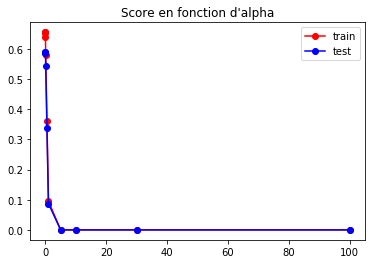

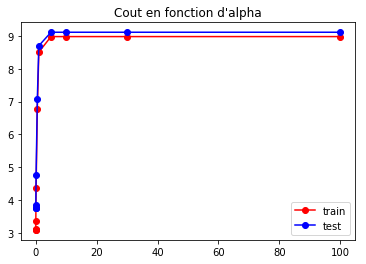

In [9]:
score_test = []
score_train = []
cout_train = []
cout_test = []
for a in alpha:
    reg_las = linear_model.Lasso(alpha=a)
    reg_las.fit(dtrx, dtry)
    score_test.append(reg_las.score(dtex,dtey))
    score_train.append(reg_las.score(dtrx, dtry))
    
    pred_train = reg_las.predict(dtrx) 
    pred_test = reg_las.predict(dtex)
    w = sum([abs(x) for x in reg_las.coef_])
    cout_train.append(mean_squared_error(dtry, pred_train) + a*w)
    cout_test.append(mean_squared_error(dtey, pred_test) + a*w)
    
print("score train : ", score_train)
print("score test : ", score_test)

plt.plot(alpha, score_train, marker="o", color='red', label='train')
plt.plot(alpha, score_test, marker="o", color='blue', label='test')
plt.title("Score en fonction d'alpha")
plt.legend()
plt.show()

plt.plot(alpha, cout_train, marker="o", color='red', label="train")
plt.plot(alpha, cout_test, marker="o", color='blue', label="test")
plt.title("Cout en fonction d'alpha")
plt.legend()
plt.show()

Nous observons que plus alpha augmente plus les scores de bonnes classification sur les données d'apprentissage et de test diminuent. Pour des alpha supérieur à 1 ils sont même nuls.<br>
D'autre part le coût quadratique de Lasso augmente lorsque alpha augmente, cependant contrairement au coût de la régression ridge il se stabilise autour de 9 lorsque alpha est supérieur à 5. 


# LASSO et Inpainting

## Fonctions pour la manipulation des images et des patchs

In [5]:
def read_im(fn):
    """permet de lire une image et de la renvoyer sous forme d'un numpy.array"""
    
    tab = plt.imread(fn)
    tab = tab*1.0/255
    for i in range(len(tab)):
        for j in range(len(tab[i])):
            tab[i][j] = col.rgb_to_hsv(tab[i][j])
    return tab

In [6]:
def affiche_image(tab):
    """affiche l'image"""
    tab2=tab.copy()
    for i in range(len(tab2)):
        for j in range(len(tab2[i])):
            if(sum(tab2[i][j])==-300):
                    tab2[i][j] = [0, 0, 0]
            else:
                tab2[i][j] = col.hsv_to_rgb(tab2[i][j])
    plt.imshow(tab2)
    plt.show()

In [7]:
def get_patch(i, j, h, im):
    """hyp : h est impair
    fonction qui retourne le patch centré en (i,j) de longueur de coté h de l'image im"""
    
    res = []
    for ix in range(i-(h//2), i+(h//2)+1):
        tmp = []
        for jx in range(j-(h//2), j+(h//2)+1):
            if(ix>=len(im) and jx>=len(im[0])):
                tmp.append(im[len(im)-1][len(im[0])-1])
            elif(ix>=len(im) and jx<0):
                tmp.append(im[len(im)-1][0])
            elif(ix<0 and jx>=len(im[0])):
                tmp.append(im[0][len(im[0])-1])
            elif(ix<0 and jx<0):
                tmp.append(im[0][0])
            elif (ix>=len(im)):
                tmp.append(im[len(im)-1][jx])
            elif(ix<0):
                tmp.append(im[0][jx])
            elif(jx>=len(im[ix])):
                tmp.append(im[ix][len(im[ix])-1])
            elif(jx<0):
                tmp.append(im[ix][0])
            else:
                tmp.append(im[ix][jx])
        res.append(tmp)
    return np.array(res)

En ce qui concerne la fonction get_patch nous avons fait le choix de répliquer les pixels au bord de l'image lorsque cette fonction est appelée pour un pixel se situant à proximité du bord de l'image.

In [8]:
def patch_to_vector(p):
    """fonction qui transfome un patch en vecteur"""
    
    return np.reshape(p, (1,p.size))[0]

In [9]:
def vector_to_patch(v, h):
    """fonction qui transforme un vecteur en patch"""
    
    return np.reshape(v, (h,h,3))

In [10]:
def noise(im, prc):
    """hyp : 0 <= prc <= 1
    Fonction qui bruite prc% de l'image"""
    
    nb = (im.size/3)*prc
    for x in range(int(nb)):
        i = random.randint(0,len(im)-1)
        j = random.randint(0,len(im[0])-1)
        im[i][j] = [-100, -100, -100]
    return im

In [11]:
def delete_rect(im, i, j, h, w):
    """hyp : h impaire
             w impaire
    Supprimer le rectangle dont l'angle haut gauche est en (i,j) de taille (h,w) dans l'image im"""
    
    for ix in range(i, i+h):
        for jx in range(j, j+h):
            im[ix][jx] = [-100, -100, -100]
    return im

In [12]:
def patch_pixel_manquant(dic_p):
    """fonction qui retourne tous les patch contenant des pixels manquant dans l'image"""
    
    res = []
    for (i,j) in dic_p.keys():
        bo = False
        for ix in range(len(dic_p[(i,j)])):
            for jx in range(len(dic_p[(i,j)][ix])):
                if(sum(dic_p[(i,j)][ix][jx])==-300):
                    res.append((i,j))
                    bo = True
                    break
            if(bo==True):
                break
    return res

In [13]:
def patch_pixel_non_manquant(dic_p):
    res = dic_p.copy()
    p_manq = patch_pixel_manquant(res)
    for (i,j) in p_manq:
        del res[(i,j)]
    return res   

In [14]:
def dic_patch_old(im, step):
    """hyp : image carré
       step : diviseur de la largeur de l'image et impaire
    Fonction qui créé un cadrillage sous forme de dictionnaire de patch"""
    
    res = dict()
    for i in range((step//2)+1, len(im), step):
        for j in range((step//2)+1, len(im[i]), step):
            res[(i,j)] = get_patch(i, j, step, im)
    return res

In [15]:
def dic_patch(im, step):
    """hyp : image carré
       step : diviseur de la largeur de l'image et impaire
    Fonction qui créé un cadrillage sous forme de dictionnaire de patch"""
    
    res = dict()
    for i in range((step//2), len(im), step):
        for j in range((step//2), len(im[i]), step):
            res[(i,j)] = get_patch(i+1, j+1, step, im)
    return res    

Nous avons commencé par tester si nos fonctions de bruitages fonctionnaient correctement.<br>
Dans un premier temps nous avons appliqué la fonction noise, afin qu'elle retire 30 % des pixels de l'image.

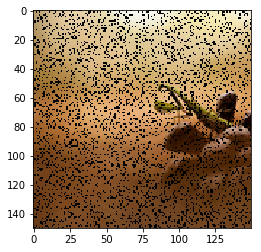

In [26]:
tab = read_im("./grillon.jpg")
im = noise(tab, 0.2)
affiche_image(im)

Puis nous avons utilisé la fonction delete_rect afin qu'elle retire un carré de 11 pixels de côté.

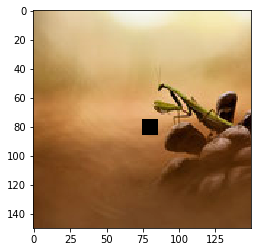

In [28]:
tab = read_im("./grillon.jpg")
im2 = delete_rect(tab, 75,75, 11,11)
affiche_image(im2)

## Fonction pour approximer le patch

Nous avons ensuite cherché à écrire une fonction qui nous permettrait d'approximer la couleur des pixels d'un patch, à partir d'un ensemble d'autres patchs. Pour cela nous avons utilisé l'algorithme lasso.

In [16]:
def approxim_patch(patch, dico, a):
    """retourne le vecteur poids du dictionnaire qui approxime au mieux le patch"""
    
    #on retire les patchs qui possèdent des pixels manquant
    dico = patch_pixel_non_manquant(dico)
    
     #cration de l'ensemble de l'apprentissage
    l_app = []
    l_patch = []
    for p in dico.keys():
        tmp = []
        for i in range(len(patch)):
            for j in range(len(patch[i])):
                if(sum(patch[i][j])!=-300):
                    for c in range(3):
                        tmp.append(dico[p][i][j][c])
        l_app.append(tmp)
        
    for i in range(len(patch)):
        for j in range(len(patch[i])):
            if(sum(patch[i][j])!=-300):
                for c in range(3):
                    l_patch.append(patch[i][j][c])
    
    l_app = np.array(l_app)
    l_app = l_app.T
    
    l_patch = np.array(l_patch)
    
    reg_las = linear_model.Lasso(alpha=a)
    
    reg_las.fit(l_app, l_patch)
    
    w = reg_las.coef_
    
    pred = reg_las.predict(l_app)
    
    sum_w = sum([abs(x) for x in w])
    
    cout = mean_squared_error(l_patch, pred) + a*sum_w
        
    return w, cout

Nous avons réalisé plusieurs tests d'approximation pour trouver le vecteur poids w avec différents paramètres lambda.

In [32]:
tab = read_im("./panda_roux2.jpg")
dico = dic_patch(tab.copy(), 75)
patch = get_patch(50,50, 75, tab.copy())

print("Test avec une image non bruitée et un patch non bruité")
w,cout = approxim_patch(patch, dico, 0.00001)
print("w : ", w)
print("cout : ", cout)

Test avec une image non bruitée et un patch non bruité
w :  [  1.24688337e-01  -1.54749663e-02   2.13226914e-02  -4.48368684e-02
   8.65449002e-03   5.52665085e-02   1.82102085e-02   1.01002389e-01
   2.13467536e-01   2.93904404e-01   1.71859798e-02   4.13795347e-04
  -1.06239457e-02   1.01345774e-02   3.42242297e-03   4.18620030e-03
  -1.09094637e-01   1.52753005e-01   6.70676516e-02  -3.12791634e-02
   6.81673287e-03   6.56155937e-03  -2.20331651e-03   7.82676192e-03
   4.06839986e-02   6.37932842e-02  -6.94950749e-03   8.31008869e-02
  -1.27680654e-02   1.99509100e-03   1.44317273e-03   1.98821204e-02
  -1.09910783e-01   5.15529702e-02   2.82551578e-02  -1.81930396e-03
   1.02868835e-02  -2.04644066e-02   2.08183331e-04  -1.45450887e-02
   1.24290202e-02  -1.83977875e-02   2.71696001e-03  -2.60006744e-03
  -7.75261522e-04  -4.60453411e-03  -2.53664061e-02  -6.91736383e-03
   5.71547897e-03  -5.04268065e-03   1.13568200e-03  -5.46769611e-03
   2.15359021e-03  -1.76021032e-02  -1.7698

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [33]:
tab = read_im("./panda_roux2.jpg")
patch = get_patch(50,50, 25, tab.copy())
im = noise(tab.copy(), 0.01)
dico = dic_patch(im.copy(), 25)

print("Test avec une image bruitée à 1% et un patch non bruité")
w,cout = approxim_patch(patch, dico, 0.00001)
print("w : ", w)
print("cout : ", cout)

Test avec une image bruitée à 1% et un patch non bruité
w :  [ 0.85517371]
cout :  0.00101348922479


In [35]:
tab = read_im("./panda_roux2.jpg")
im = noise(tab.copy(), 0.01)
dico = dic_patch(im.copy(), 15)
patch = get_patch(50,50, 15, im.copy())
patch = noise(patch.copy(), 0.001)

print("Test avec une image bruitée à 1% et un patch bruité à 1%")
w, cout = approxim_patch(patch, dico, 0.00001)
print("w : ", w)

Test avec une image bruitée à 1% et un patch bruité à 1%
w :  [  3.14171279e-01   1.99614648e-01   2.99696294e-01  -2.59023535e-02
   3.51241214e-02  -7.33225360e-03   1.45595048e-01   1.70992406e-01
   4.54461387e-03   2.70508073e-02  -0.00000000e+00   1.29867050e-01
   3.15422316e-06  -0.00000000e+00   8.10926547e-05   0.00000000e+00
   3.38789251e-02  -0.00000000e+00   2.23737899e-03  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.14508414e-03   1.30903967e-03
   9.45223732e-02   0.00000000e+00   0.00000000e+00  -2.20596462e-04
   3.45877242e-02   5.85804404e-03  -5.78055656e-02   1.19662957e-02
   1.96803642e-03  -1.42090234e-02  -6.39285365e-04   0.00000000e+00
   0.00000000e+00   7.03824455e-04   1.69208355e-03  -4.78178930e-03
  -7.49657580e-02  -2.08793304e-04   5.42051563e-02   7.53601233e-02
  -4.32170099e-03  -0.00000000e+00  -8.92185833e-02   7.00935440e-02
  -3.58428299e-02  -3.15996997e-02  -4.03624768e-04   7.00623443e-03
  -4.89023412e-02  -5.11636265e-03   4.98

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


On observe que la taille du vecteur poids dépend du nombre de pixels manquant dans le patch ainsi que du pourcentage de bruit dans l'image. En effet, seul les pixels non manquant du patch sont sélectionnés pour trouver un vecteur poids.

In [17]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]

In [18]:
def graph_alpha(dico, patch, alphas):
    """affiche le graph des couts MSE pour une image"""
    
    cout = []
    for a in alphas:
        tmp,c = approxim_patch(patch, dico, a)
        cout.append(c)
    
    plt.plot(alphas, cout, marker="o")
    plt.title("Graphique représentant les cout MSE en fonction des valeurs de lambda")
    plt.show()

Nous avons ensuite réalisé des test pour une image non bruitée et un patch non bruité en faisant varier les valeurs de lambda.

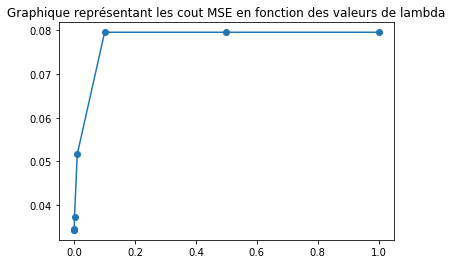

In [38]:
tab = read_im("./panda_roux3.jpg")
dico = dic_patch(tab.copy(), 25)
patch = get_patch(50,50, 25, tab.copy())

graph_alpha(dico, patch, alphas)

Test pour une image bruitée à 1% et un patch non bruité en faisant varier les valeur de lambda

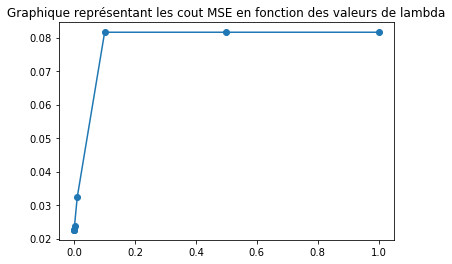

In [39]:
tab = read_im("./panda_roux3.jpg")
patch = get_patch(50,50, 15, tab.copy())
im = noise(tab, 0.01)
dico = dic_patch(im.copy(), 15)

graph_alpha(dico, patch, alphas)

Test pour une image bruitée à 0.1% et un patch bruité à 0.1% à partir de l'image d'origine en faisant varier les valeur de lambda

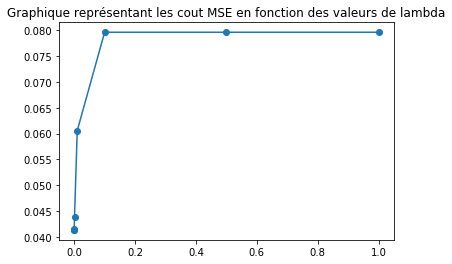

In [40]:
tab = read_im("./panda_roux3.jpg")
im = noise(tab, 0.001)
dico = dic_patch(im.copy(), 25)
patch = get_patch(50,50, 25, im.copy())

graph_alpha(dico, patch, alphas)

## Remplissage d'une image

Après avoir réussi à approximé la couleur des pixels d'un patch, nous avons cherché à reconstruire une image dont certains pixels étaient absents.

In [19]:
def remplissage_patch(dico, patch, w):
    """remplissage d'un patch"""
    
    t = len(patch)
    i = t//2
    #print("w",w)
    #print("len dico", len(dico.keys()))
    #print("len w", len(w))
    res = np.zeros(3) 
    wi = 0
    #print(patch[i][i])
    dico = patch_pixel_non_manquant(dico)
    for k in dico.keys():
        #print("w[wi]", w[wi])
        res += np.array(dico[k][i][i])*w[wi]
        wi += 1
        
    p_res = patch.copy()
    p_res[i][i] = res
    #print(p_res[i][i])
    return p_res

Nous avons fait plusieurs tests, le premier consistait à approximer la couleur d'un seul pixel avec le LASSO.

C:\Users\alexi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


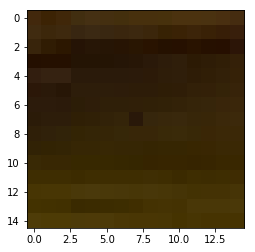

In [17]:
tab = read_im("./paysage.jpg")
im2 = delete_rect(tab.copy(), 75,75, 11,11)
dico = dic_patch(im2.copy(), 15)

patch = get_patch(100, 100, 15, im2.copy())

#affiche_image(patch)

w, c = approxim_patch(patch, dico, 0.00001)

patch = remplissage_patch(dico, patch, w)
affiche_image(patch)

Puis nous avons étendu cette aproximation à tous les pixels manquant d'une image.

In [20]:
def all_remplissage(image, taille_p, a):
    
    im = image.copy()
    
    #init
    deb_i = 0
    deb_j = 0
    fin_i = len(im)
    fin_j = len(im[0])
    
    affiche_image(im)
    
    #parcourt
    while(deb_i!=fin_i and deb_j!=fin_j):
        #aller
        for j in range(deb_j, fin_j, 1):
            if(sum(im[deb_i][j])==-300):
                dico = dic_patch(im.copy(), taille_p)
                patch = get_patch(deb_i, j, taille_p, im)
                #affiche_image(patch)
                w, c = approxim_patch(patch, dico, a)
                
                patch = remplissage_patch(dico, patch, w)
                im[deb_i][j] = patch[taille_p//2][taille_p//2]
                #affiche_image(patch)
                
        for i in range(deb_i, fin_i, 1):
            if(sum(im[i][fin_j-1])==-300):
                dico = dic_patch(im.copy(), taille_p)
                patch = get_patch(i, fin_j-1, taille_p, im)
                #affiche_image(patch)
                w, c = approxim_patch(patch, dico, a)
                
                patch = remplissage_patch(dico, patch, w)
                im[i][fin_j-1] = patch[taille_p//2][taille_p//2]
                #affiche_image(patch)
                
        #retour
        for j in range(fin_j-1, deb_j-1, -1):
            if(sum(im[fin_i-1][j])==-300):
                dico = dic_patch(im.copy(), taille_p)
                patch = get_patch(fin_i-1, j, taille_p, im)
                #affiche_image(patch)
                w, c = approxim_patch(patch, dico, a)
                
                patch = remplissage_patch(dico, patch, w)
                im[fin_i-1][j] = patch[taille_p//2][taille_p//2]
                #affiche_image(patch)
                
        for i in range(fin_i-1, deb_i-2, -1):
            if(sum(im[i][deb_j])==-300):
                dico = dic_patch(im.copy(), taille_p)
                patch = get_patch(i, deb_j, taille_p, im)
                #affiche_image(patch)
                w, c = approxim_patch(patch, dico, a)
                
                patch = remplissage_patch(dico, patch, w)
                im[i][deb_j] = patch[taille_p//2][taille_p//2]
                #affiche_image(patch)
        #affiche_image(patch)      
        #mise à jour du parcourt circulaire
        deb_i += 1
        deb_j += 1
        fin_i -= 1
        fin_j -= 1
        
    affiche_image(im)
    
    return im

Nous avons continué nos tests sur une image monochrome peu bruitée (1% de pixels manquants).

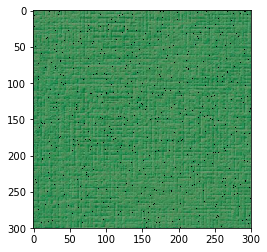

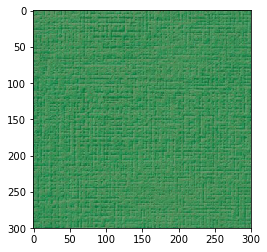

In [44]:
tab = read_im("./vert.jpg")
im = noise(tab, 0.01)

a = all_remplissage(im.copy(), 15, 0.001)

Nous observons que notre algorithme approxime bien la couleur des pixels manquants.

Nous avons ensuite réalisé des tests sur une image plus bruitée (10% de pixels manquants).

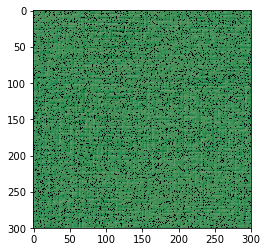

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


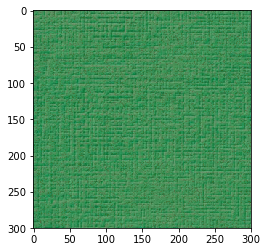

In [56]:
tab = read_im("./vert.jpg")
im = noise(tab, 0.1)

a = all_remplissage(im.copy(), 5, 0.001)

On voit que même avec 10% de bruit, le programme arrive à corriger les pixels correctement. Cet algorithme est donc à privilégier lorsque l'image ne possède pas beaucoup de nuances de couleur.

Nous avons testé notre algorithme sur une image dont il manquait un carré de 11 pixels de coté.

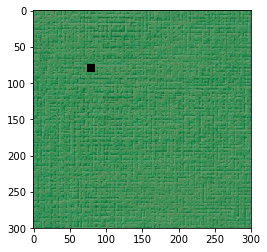

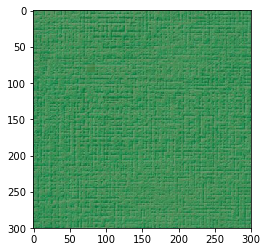

In [57]:
tab = read_im("./vert.jpg")
im = delete_rect(tab, 75,75, 11,11)

a = all_remplissage(im.copy(), 15, 0.001)

Nous observons que sur cette image monochrome, l'algorithme marche trés bien pour corriger un bruitage concentré.

Nous avons essayé d'augmenter la taille du carré de pixels manquants. Nous sonmme passé d'un carrée de 11 pixels de coté à un carré de 23 pixels de coté. 

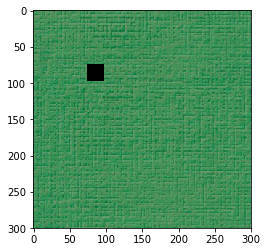

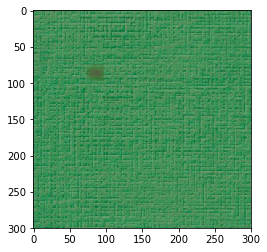

In [58]:
tab = read_im("./vert.jpg")
im = delete_rect(tab, 75,75, 23,23)

a = all_remplissage(im.copy(), 15, 0.001)

Nous observons que notre algorithme parvient quand même à corriger l'erreur cependant les pixels au centre du carré sont moins bien approximés.

Nous avons ensuite testé de corriger un carrée de 23 pixels de coté mais avec un patch plus petit (5 pixels de coté contre 15 précédemment).

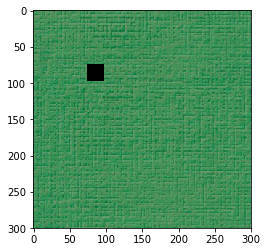

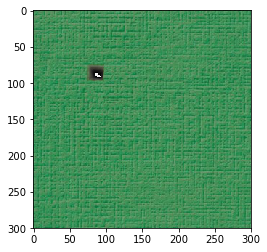

In [59]:
tab = read_im("./vert.jpg")
im = delete_rect(tab, 75,75, 23,23)

a = all_remplissage(im.copy(), 5, 0.001)

Nous observons q'un bruit trop important et concentré ne peut pas être corrigé avec un patch très petit. De plus, on peut remarquer qu'avec un patch de taille 5 de côté, la correction n'est vraiment pas très bonne, on peut parler ici de sous_apprentissage.

Nous avons essayé de voir si avec un pacth plus grand il est possible de totalement corriger une image avec un carré manquant de 23 pixels de coté.

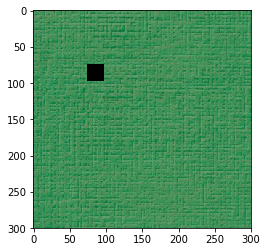

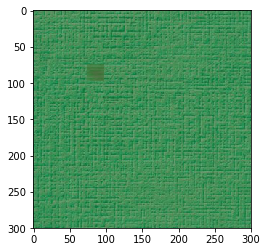

In [21]:
tab = read_im("./vert.jpg")
im = delete_rect(tab, 75,75, 23,23)

a = all_remplissage(im.copy(), 25, 0.001)

Avec un patch plus grand (25 pixels de coté) nous observons que la correction est légèrement meilleure, cependant elle n'est pas parfaite.

Dans un deuxième temps nous avons réalisé des tests similaires mais sur une image possédant plus de couleurs.

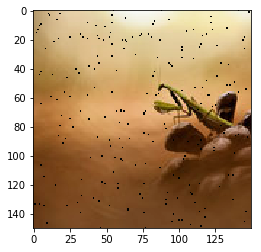

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


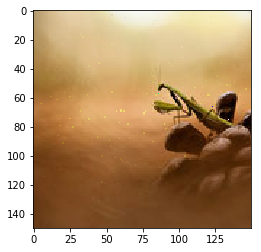

In [28]:
tab = read_im("./grillon.jpg")
im = noise(tab, 0.01)

a = all_remplissage(im.copy(), 5, 0.00001)

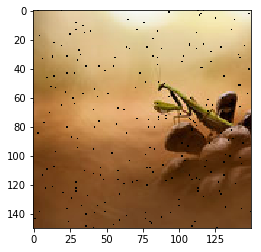

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


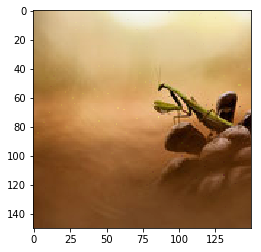

In [27]:
tab = read_im("./grillon.jpg")
im = noise(tab, 0.01)

a = all_remplissage(im.copy(), 15, 0.00001)

En augmentant la nuance des couleurs sur une image, on voit que la correction se passe bien. Néansmoins la première image est moins bien corrigé que la seconde, en effet sur la première le patch est plus petit, on voit à nouveau du sous-apprentisssage du à la taille du patch. Il est donc important de bien choisir la taille du patch car le résultat peut être moins bon et beaucoup plus long.

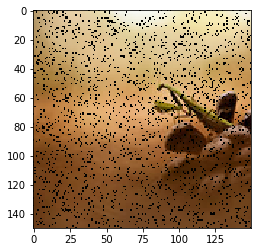

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


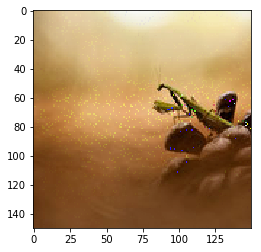

In [47]:
tab = read_im("./grillon.jpg")
im = noise(tab, 0.1)

a = all_remplissage(im.copy(), 5, 0.00001)

On peut voir sur le test ci-dessus que lorsqu'il y a beaucoup de bruit (ici 10%), la correction est plus difficile et ne marche pas très bien. En effet lorsqu'il y a beaucoup de bruit, nous sommes obligées de prendre un patch plus petit ce qui diminu la qualité de la correction.

Nous avons recommencé les mêmes tests sur une autre image présentant encore plus de nuances de couleurs.

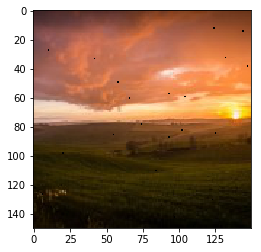

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


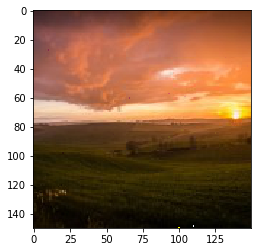

In [51]:
#petit patch (5px) très peu de bruit (0.1%)
tab = read_im("./paysage.jpg")
im = noise(tab, 0.001)

a = all_remplissage(im.copy(), 5, 0.00001)

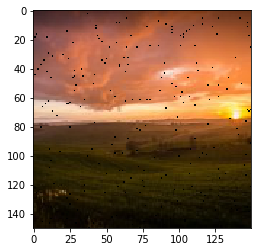

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


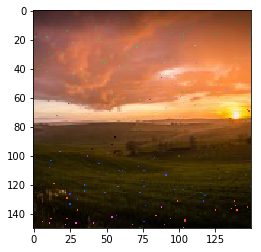

In [49]:
#petit patch (5px) peu de bruit (1%)
tab = read_im("./paysage.jpg")
im = noise(tab, 0.01)

a = all_remplissage(im.copy(), 5, 0.00001)

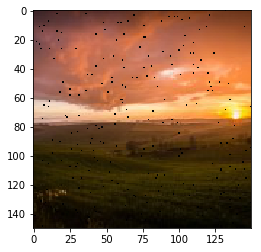

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


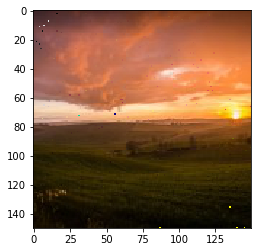

In [29]:
#patch moyen (15px) peu de bruit (1%)
tab = read_im("./paysage.jpg")
im = noise(tab, 0.01)

a = all_remplissage(im.copy(), 15, 0.00001)

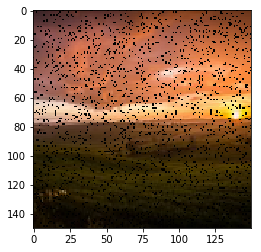

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


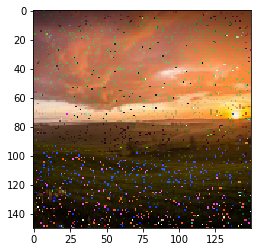

In [50]:
#petit patch (5px) beaucoup de bruit (10%)
tab = read_im("./paysage.jpg")
im = noise(tab, 0.1)

a = all_remplissage(im.copy(), 5, 0.00001)

Comme précédemment nous observons qu'avec un patch plus petit ou un image avec beaucoup de burit la correction se fait moins bien, voir très mal.

Finalement, nous avons tester notre alogorithme sur une image présentant beaucoup de couleur différentes.

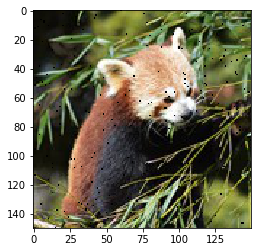

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


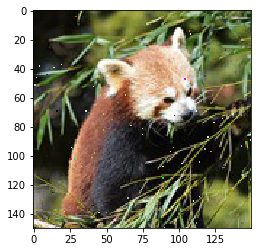

In [52]:
tab = read_im("./panda_roux3.jpg")
im = noise(tab, 0.01)

a = all_remplissage(im.copy(), 5, 0.00001)

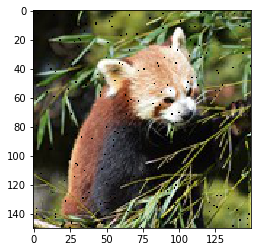

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


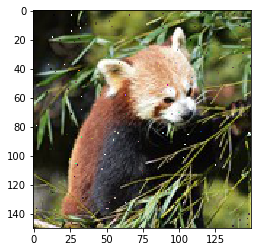

In [31]:
tab = read_im("./panda_roux3.jpg")
im = noise(tab, 0.01)

a = all_remplissage(im.copy(), 15, 0.00001)

Nous observons que même avec un patch plus grand l'image n'est pas totalement corrigée. 

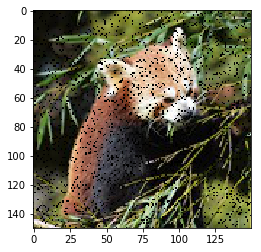

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


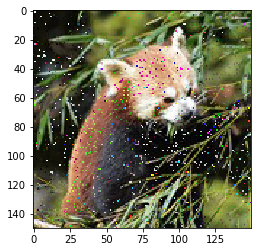

In [53]:
tab = read_im("./panda_roux3.jpg")
im = noise(tab, 0.1)

a = all_remplissage(im.copy(), 5, 0.00001)

Nous observons de nouveau qu'il est difficile de corriger une image avec beaucoup de bruit.

Enfin, nous avons utilisé notre algorithme sur une image dont il manqué un carré de 11 pixels de coté.

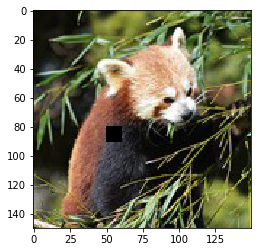

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


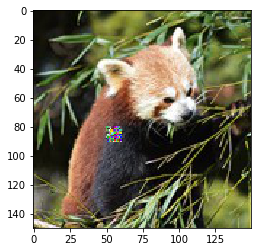

In [21]:
tab = read_im("./panda_roux3.jpg")
im = delete_rect(tab, 80,50, 11,11)

a = all_remplissage(im.copy(), 5, 0.00001)

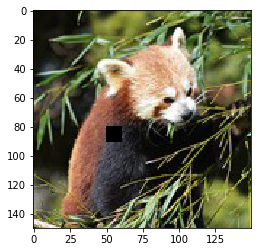

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


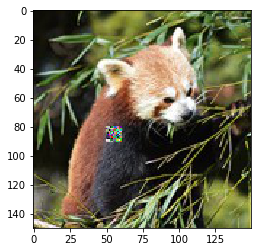

In [22]:
tab = read_im("./panda_roux3.jpg")
im = delete_rect(tab, 80,50, 11,11)

a = all_remplissage(im.copy(), 15, 0.00001)

Nous observons qu'avec un petit patch comme avec un patch moyen la correction n'est pas très bonne.

### Conclusion

Il est tout a fait possible d'utiliser l'algorithme de Lasso pour faire de la correction d'image, cependant plus l'image possède de couleurs différentes ou plus elle est bruitée plus il est difficile de la reconstruire correctement.<br>
D'autre part la taille du patch utilisé pour la reconstruction est également très important, en effet un patch plus petit permet de reconstruire une image très bruitée mais il réalise une moins bonne approximation.